# EDA on Haberman Dataset

### The dataset is of shape (306, 4)
### Out of 4 columns, first 3 columns are independent features
### The attributes are as follows:
        Column 1 - Age of the patient diagnosed of Breast Cancer
        Column 2 - The year of operation
        Column 3 - Number of positive auxilary nodes detected
        Column 4 - Survival Status (Class based)
                    -- 1 -> Patient survived for 5 or more than 5 years
                    -- 2 -> Patient died within 5 years

## Objective:
    - Explore the dataset and perform Univariate, Bi-variate analysis.
    - Derive usefull information about the data which can be used in classification.
    - Write down your observations.

# 1. Setup

In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read the csv file using pandas

df = pd.read_csv(
    "haberman.csv", header = None, 
    names = ['age', 'year_of_operation', 'positive_axil_nodes', 'survival_status']
)
df.head()

,age,year_of_operation,positive_axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 2. Data Preparation

In [3]:
# let's see if there are any missing values
df.isnull().values.any()

False

In [4]:
df['age'].values

array([30, 30, 30, 31, 31, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 36,
       36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       39, 39, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59,
       59, 59, 60, 60, 60

In [5]:
# check if all the data in the rows are numerical
df_temp = df.applymap(lambda x: isinstance(x, int))
df_temp.all()

age                    True
year_of_operation      True
positive_axil_nodes    True
survival_status        True
dtype: bool

In [6]:
# let's change the name of target column name and it's values for simplicity
df = df.rename(columns={'survival_status': 'survival_after_five_years'})
df['survival_after_five_years'] = df['survival_after_five_years'].apply(lambda x: "alive" if x == 1 else "not_alive")
df.head(10)

,age,year_of_operation,positive_axil_nodes,survival_after_five_years
0,30,64,1,alive
1,30,62,3,alive
2,30,65,0,alive
3,31,59,2,alive
4,31,65,4,alive
5,33,58,10,alive
6,33,60,0,alive
7,34,59,0,not_alive
8,34,66,9,not_alive
9,34,58,30,alive


In [7]:
# changing the last column datatype into category
df['survival_after_five_years'] = df['survival_after_five_years'].astype('category')
df['survival_after_five_years'].dtype

category

### Observations
        - There are no missing values in the dataset
        - All the data points are integers
        - Converted last column datatype into category

# 3. High level statistics of the dataset

In [8]:
print("Total data points:", df.shape[0])
print("Total features in the data:", df.shape[-1]-1) #last column being a dependent variable (outcome)
df_counts = df['survival_after_five_years'].value_counts()
print("There are", len(df_counts), "classes in this dataset")
print('***********************')
print("The counts of each classes are:")
# for col, val in df_counts.items():
#         print(col, '-', val)
print(df_counts)
print('***********************')

Total data points: 306
Total features in the data: 3
There are 2 classes in this dataset
***********************
The counts of each classes are:
alive        225
not_alive     81
Name: survival_after_five_years, dtype: int64
***********************


In [9]:
df_survived = df[ df['survival_after_five_years'] == "alive" ]
df_not_survived = df[ df['survival_after_five_years'] == "not_alive" ]

In [10]:
# high level statistics of people who survived
df_survived.describe()

,age,year_of_operation,positive_axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [11]:
# high level statistics of people who did not survive
df_not_survived.describe()

,age,year_of_operation,positive_axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations
        - There are a total of 306 data points in the dataset.
        - There are three independent variables and one dependent variable.
        - The dataset is imbalanced.
        - Seperated data into two dataframes based on their survival to find out their respective high level information 
          seperately, which is as follows:
              1) The range of age of a person who survived in the given data is from 30 to 77 whereas for a person who 
                 did not survive had an age range of 34 to 83.
              2) 75% of people who survived had a maximum of 3 positive axillary nodes whereas 75% of people who did not 
                 survive had a maximum of 11 positive auxillary nodes.
              3) The mean of positive nodes of people who survived is 2.79 and that for people who did not survive is 
                 7.45 which is higher. But there are instances where people did not survive with 0 positive nodes (min 0).

# 4. Univariate Analysis

### Histograms with PDF

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


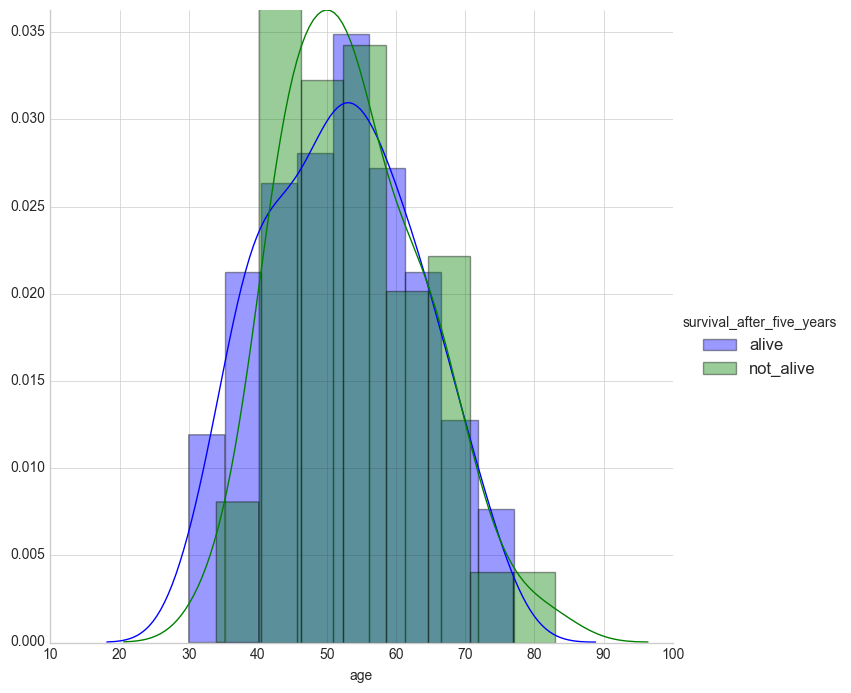

In [12]:
# Histogram with age

sns.set_style('whitegrid')
sns.FacetGrid(df, hue='survival_after_five_years', size=7).map(sns.distplot, 'age').add_legend()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


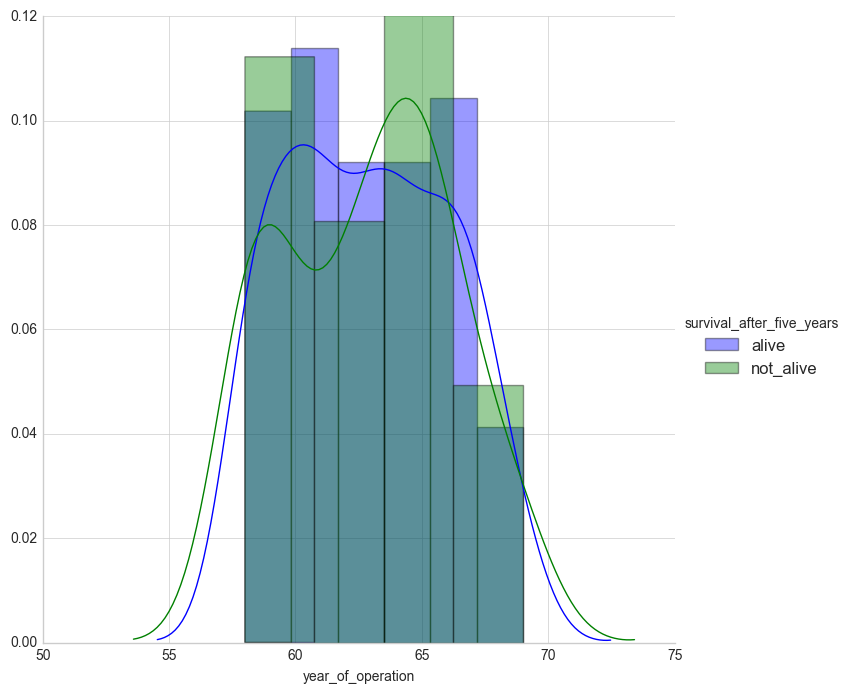

In [13]:
# histogram with year_of_operation

sns.set_style('whitegrid')
sns.FacetGrid(df, hue='survival_after_five_years', size=7).map(sns.distplot, 'year_of_operation').add_legend()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


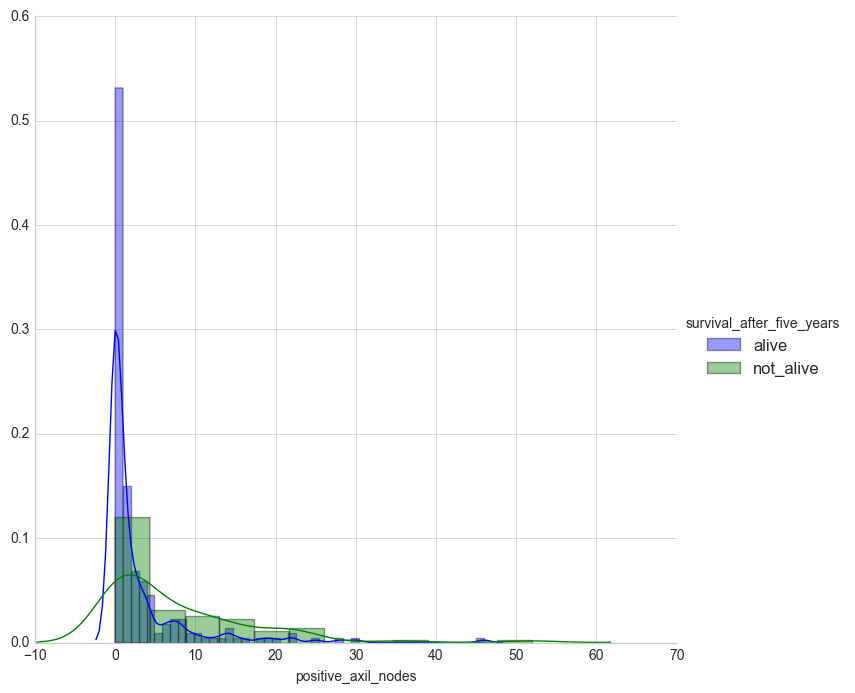

In [14]:
# histogram with number of positive auxillary nodes

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_after_five_years", size=7).map(sns.distplot, "positive_axil_nodes").add_legend()
plt.show()

### Observations
    - Classification based on single variable is quite impossible as dependent variables overlap a lot, maybe looking into
      two features (bivariate) at a time will help.
    - Statistically speaking, the survival of people with 0-2 positive axillary nodes occupies highest percentage amongst the
      total people who survived.
    - The number of people having positive axillary nodes decreases rapidly as we move right on the x-axis.

### CDF and PDF

[ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]
[ 0.05228758  0.14052288  0.29084967  0.46405229  0.64379085  0.77777778
  0.91176471  0.97058824  0.99346405  1.        ]
[ 0.00986558  0.01664817  0.02836355  0.03267974  0.03391294  0.02528055
  0.02528055  0.01109878  0.00431619  0.0012332 ]
[ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]


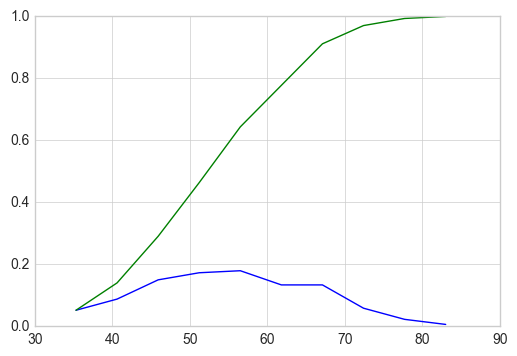

In [15]:
# cdf and pdf with age

counts, bin_edges = np.histogram(df['age'], bins=10, density=True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

print(pdf)
print(cdf)
print(counts)
print(bin_edges)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

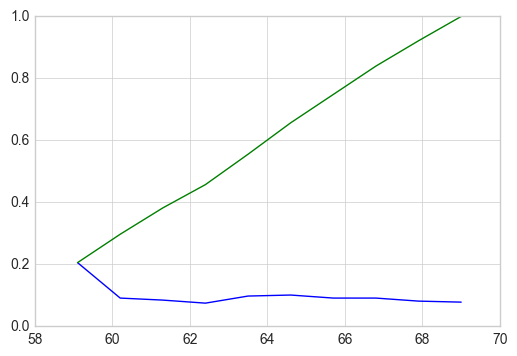

In [16]:
# cdf and pdf with year of operation

counts, bin_edges = np.histogram(df['year_of_operation'], bins=10, density=True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

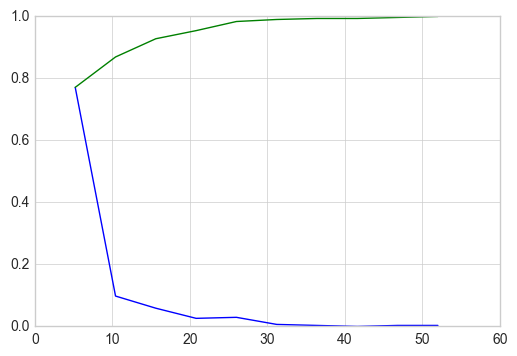

In [30]:
# cdf and pdf with positive auxillary nodes

counts, bin_edges = np.histogram(df['positive_axil_nodes'], bins=10, density=True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

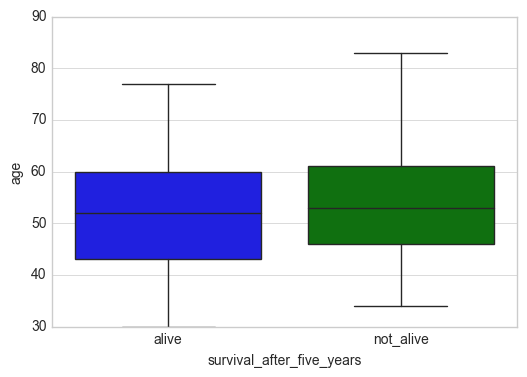

In [32]:
# box plot for age

sns.boxplot(data=df, x="survival_after_five_years", y="age")
plt.show()

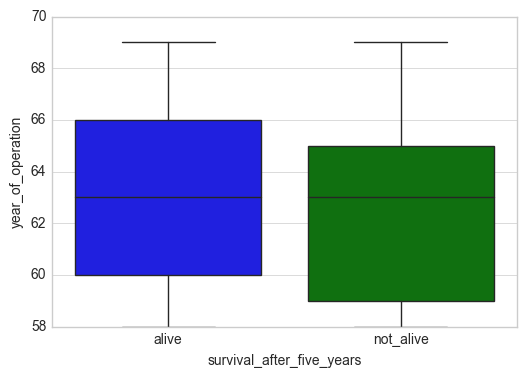

In [19]:
# box plot for year of operation

sns.boxplot(data=df, x="survival_after_five_years", y="year_of_operation")
plt.show()

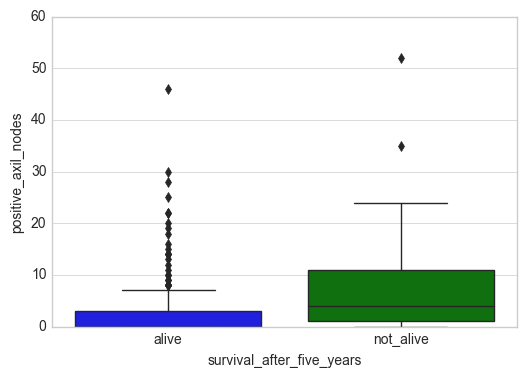

In [36]:
# box plot for positive axillary nodes

sns.boxplot(data=df, x="survival_after_five_years", y="positive_axil_nodes")
plt.show()

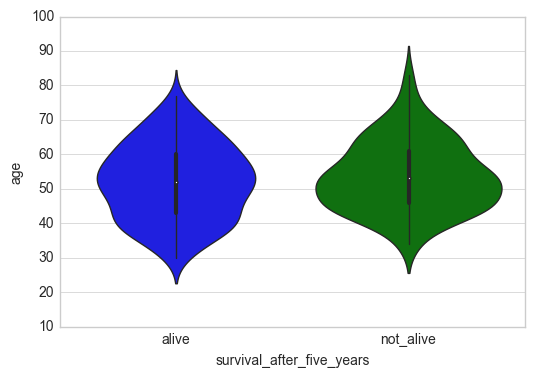

In [21]:
# violin plot for age

sns.violinplot(data=df, x="survival_after_five_years", y="age")
plt.show()

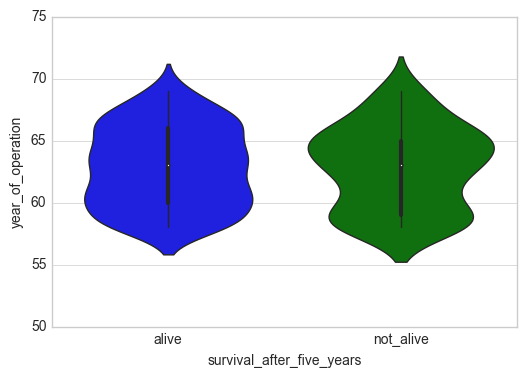

In [22]:
# violin plot for year of operation

sns.violinplot(data=df, x="survival_after_five_years", y="year_of_operation")
plt.show()

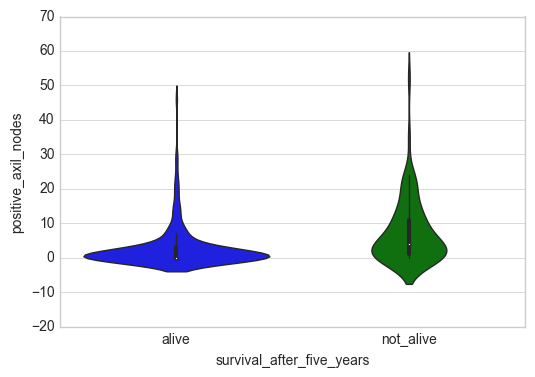

In [23]:
# violin plot for positive axillary nodes

sns.violinplot(data=df, x="survival_after_five_years", y="positive_axil_nodes")
plt.show()

### Observations
    - Approximately 20% of patients fall into 50-60 age bracket.
    - The number of positive lymph mostly occur in the range of 0-10.
    - There are so many outliers in the box plot for positive axillary nodes (weird).
    - There are patients who did not survive with 0 positive axillary nodes.

# 5. Bivariate Analysis

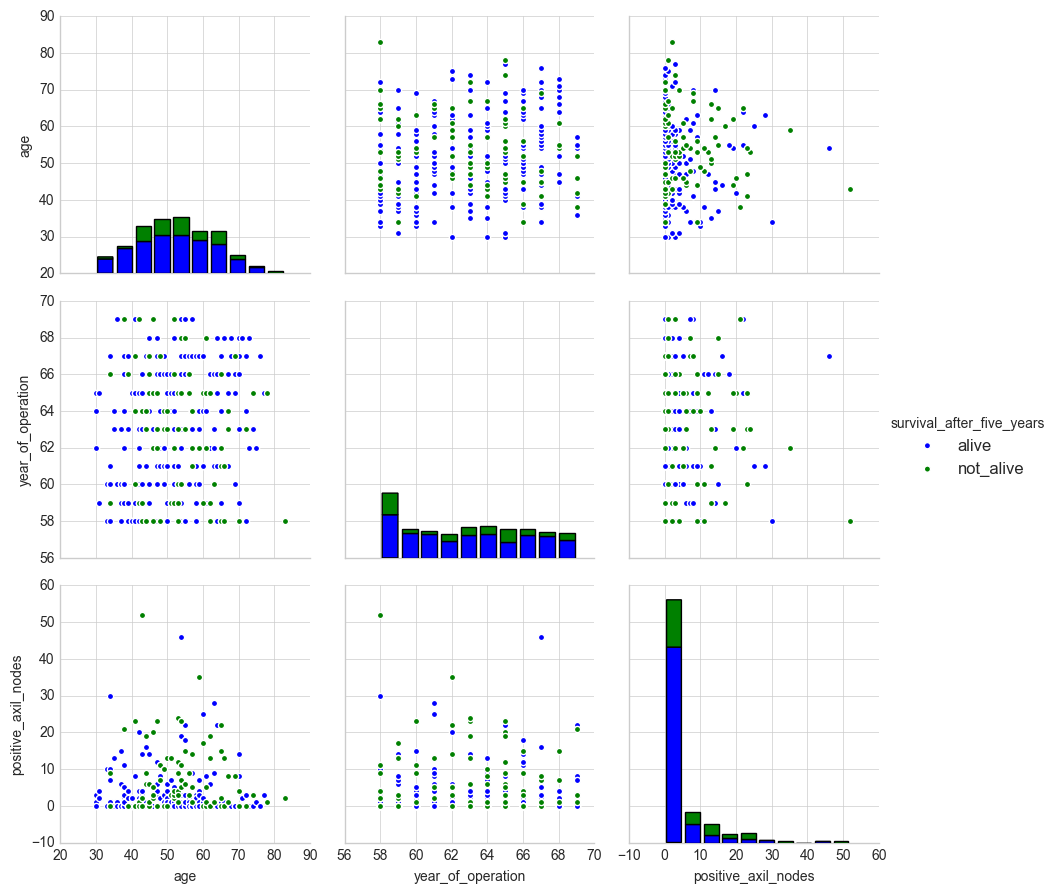

In [24]:
# pair plot

sns.set_style("whitegrid")
sns.pairplot(data=df, hue="survival_after_five_years", size=3)
plt.show()

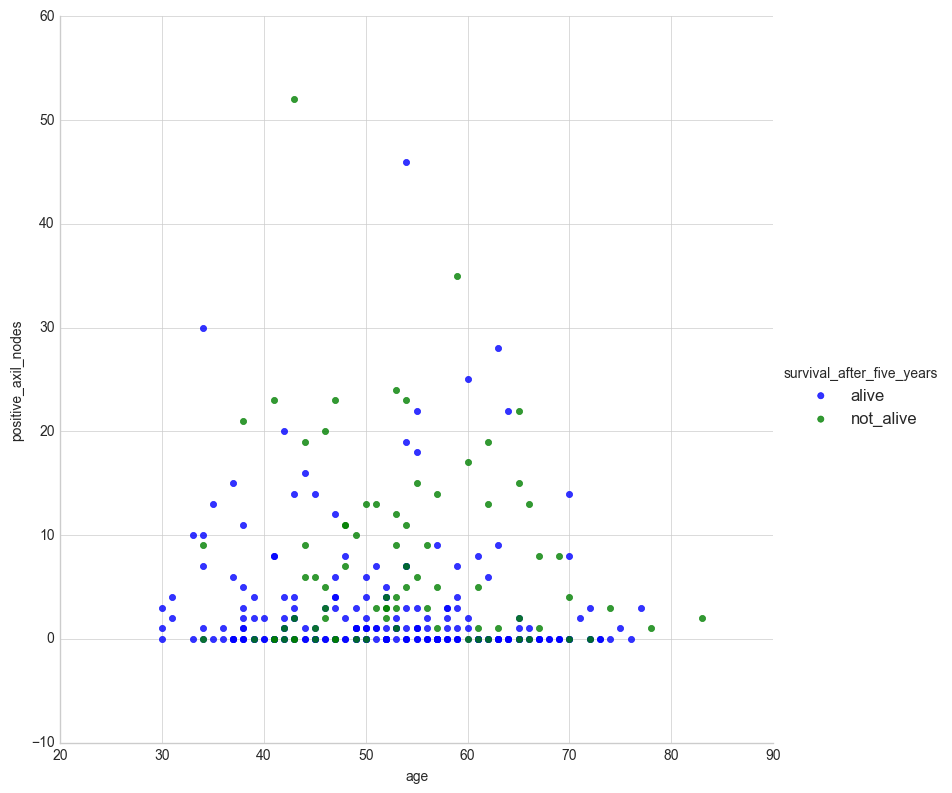

In [25]:
# let's use lmplot function in seaborn for a scatter plot

sns.lmplot("age", "positive_axil_nodes", data=df, hue="survival_after_five_years", fit_reg=False, size=8)
plt.show()

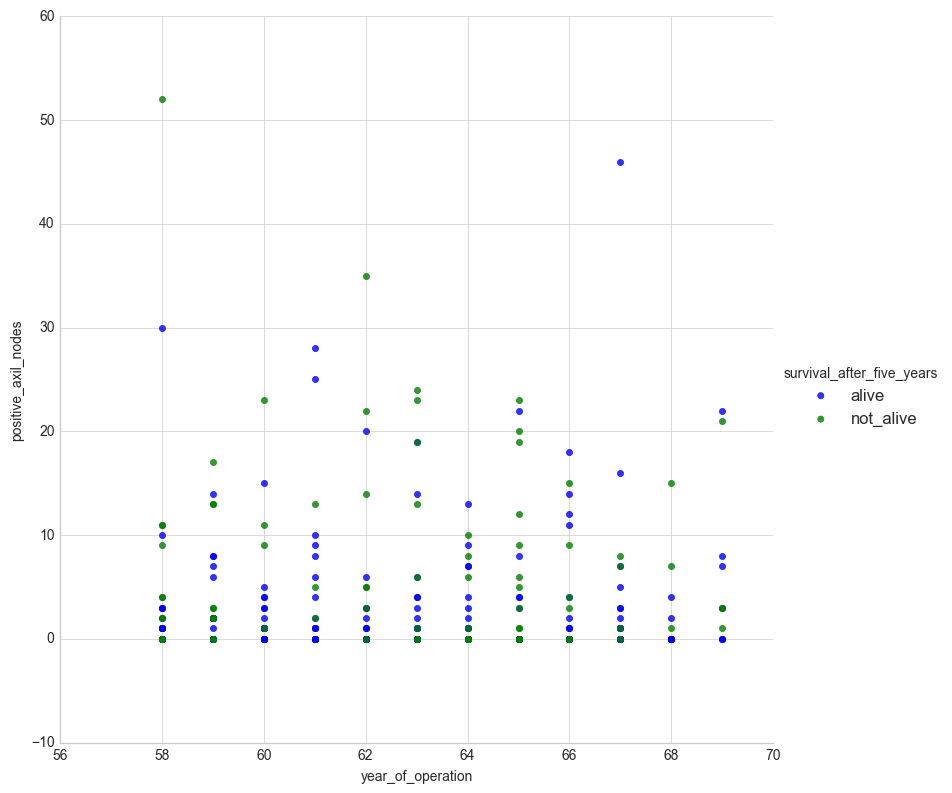

In [26]:
sns.lmplot("year_of_operation", "positive_axil_nodes", data=df, hue="survival_after_five_years", fit_reg=False, size=8)
plt.show()

### Observations
    - There seems to be no dependency of year_of_operation and age on positive_axil_nodes.
    - The data is highly overlapping even in bivariate analysis.
    
## Conclusions
    - From univariate and bivariate analysis, no single/double features are solely responsible for patient's survival.
    - This is because the features are overlapping and there is no clear seperation. This will lead to high error rates.
    - Positive axillary nodes alone also cannot be a deciding factor of patient's survival because there are few people who
      did not survive with 0 nodes.
    - Statistically speaking, the chances of survival is high if positive axillary nodes is < 3.